In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from tensorflow.keras.layers import Dense, Dropout

Step 1: Load the Data

In [ ]:


# Load the dataset
train_df = pd.read_csv('train.csv')

# Display the first few rows of the dataframe
train_df.head(), train_df.shape


(   Feature_1  Feature_2  Feature_3  Feature_4  Feature_5  Feature_6  \
 0       3289         22         19        240         93       1708   
 1       2963         21         18        134         27       1243   
 2       3037        185          9        127         10       6462   
 3       3113        203         13        190         22       2125   
 4       3128        346          9        120         36        552   
 
    Feature_7  Feature_8  Feature_9  Feature_10  ...  Feature_46  Feature_47  \
 0        205        196        122        2598  ...           0           1   
 1        206        200        127        1140  ...           0           0   
 2        222        246        158        3037  ...           0           0   
 3        213        251        171         730  ...           1           0   
 4        203        226        161         924  ...           0           0   
 
    Feature_48  Feature_49  Feature_50  Feature_51  Feature_52  Feature_53  \
 0    

Step 2: Split the Data into Features (X) and Target (Y)

Markdown explanation:
The rationale behind separating features from the target in machine learning.

Spliting data into Features and Target clarifies what the model learns from (features) and what it aims to predict (target).This separation structures the training process, teaching the model to use features to predict the target. Helps the model learn to predict new, unseen data, not just memorize the training set.It enables us to assess the model's performance by comparing its predictions (based on features) to the actual target values.

In [ ]:
# Split the data into features and target variable
X = train_df.drop('Target', axis=1)  # Features
Y = train_df['Target'] - 1  # Adjusting labels to start from 0

# Initialize the StandardScaler and transform the features
scaler = RobustScaler()
X_scaled = scaler.fit_transform(X)



Step 3: Data Splitting

Markdown explanation:
The importance of having training and test datasets in model evaluation.

**Testing Real-World Performance:** The training set is used to teach the model, while the test set helps evaluate how well it can predict new, unseen data. This split mimics real-world scenarios, ensuring the model performs well not just on familiar data but also on future data it hasn't encountered.

**Preventing Overfitting:** Overfitting happens when a model learns from the training data too closely, including its noise, and fails to generalize to new data. By testing the model on a separate dataset it hasn't seen before, we can check for overfitting and ensure our model can make accurate predictions broadly.

In [ ]:
from sklearn.model_selection import train_test_split

# Splitting the scaled dataset into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=42)


Step 4: Build the Neural Network Model

Markdown explanation:
This neural network model is designed for a multi-class classification task, structured to effectively handle datasets with a varied number of features and classes.

Model Structure:
Input Layer: The first layer is a Dense layer with 128 neurons, configured to accept input with a shape matching the number of features in the dataset. This layer is crucial for initially processing the input data.

Hidden Layers: Following the input layer, the model includes two additional Dense layers, one with 64 neurons and another with 32 neurons. These layers increase the model's capacity to learn from the data by extracting higher-level features and relationships.

Output Layer: The final layer is a Dense layer with a number of neurons equal to the number of unique classes in the target variable. This layer uses the softmax activation function to output a probability distribution across all classes.
For activation function i have choose ReLu and softmax.Reasone behind choosing:
The ReLU activation function is selected for its simplicity and performance benefits. It introduces non-linearity to the model without significantly impacting the computational cost, making it ideal for training deep neural networks.

The softmax activation function is critical for multi-class classification problems. By converting the model's logits to probabilities, softmax allows for a direct comparison between classes, facilitating the selection of the most likely class for each input.

The adam optimizer is choosen for better optimization.




In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam

custom_lr = 1e-2
optimizer = Adam(learning_rate=custom_lr)


# Determine the number of unique classes for the output layer
num_classes = Y.nunique()

# Building the neural network model
model = Sequential([
    Dense(256, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),  # Dropout layer to prevent overfitting
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dense(num_classes, activation='softmax')  # Configured for multi-class classification
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 256)               14080     
                                                                 
 dropout_6 (Dropout)         (None, 256)               0         
                                                                 
 dense_13 (Dense)            (None, 128)               32896     
                                                                 
 dropout_7 (Dropout)         (None, 128)               0         
                                                                 
 dense_14 (Dense)            (None, 64)                8256      
                                                                 
 dense_15 (Dense)            (None, 7)                 455       
                                                                 
Total params: 55687 (217.53 KB)
Trainable params: 5568

Step 5: Train the Model

The adam optimizer is choosen for better optimization.Adam is favored for its efficiency and effectiveness in practice. It combines the best properties of the AdaGrad and RMSProp algorithms to handle sparse gradients on noisy problems.

For the loss function "Sparse Categorical Crossentropy" is choosen.This loss function is ideal for multi-class classification problems where each instance is supposed to belong to a single class out of many possible classes, and the labels are integers.I It's particularly useful when dealing with a large number of classes.

In [ ]:
# Train the model with the adjusted labels
history = model.fit(X_train, Y_train, epochs=25, batch_size=32)

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, Y_test)
print(f"Test Accuracy: {test_acc:.4f}")

Epoch 1/25
11621/11621 [==============================] - 37s 3ms/step - loss: 0.3730 - accuracy: 0.8446
Epoch 2/25
11621/11621 [==============================] - 35s 3ms/step - loss: 0.3695 - accuracy: 0.8467
Epoch 3/25
11621/11621 [==============================] - 32s 3ms/step - loss: 0.3663 - accuracy: 0.8483
Epoch 4/25
11621/11621 [==============================] - 32s 3ms/step - loss: 0.3632 - accuracy: 0.8494
Epoch 5/25
11621/11621 [==============================] - 30s 3ms/step - loss: 0.3615 - accuracy: 0.8501
Epoch 6/25
11621/11621 [==============================] - 29s 3ms/step - loss: 0.3583 - accuracy: 0.8514
Epoch 7/25
11621/11621 [==============================] - 27s 2ms/step - loss: 0.3560 - accuracy: 0.8533
Epoch 8/25
11621/11621 [==============================] - 27s 2ms/step - loss: 0.3543 - accuracy: 0.8542
Epoch 9/25
11621/11621 [==============================] - 27s 2ms/step - loss: 0.3517 - accuracy: 0.8554
Epoch 10/25
11621/11621 [==============================

Step 6: Model Evaluation

2906/2906 [==============================] - 10s 3ms/step - loss: 0.2534 - accuracy: 0.9002
Model test accuracy: 0.90
Model test loss: 0.25


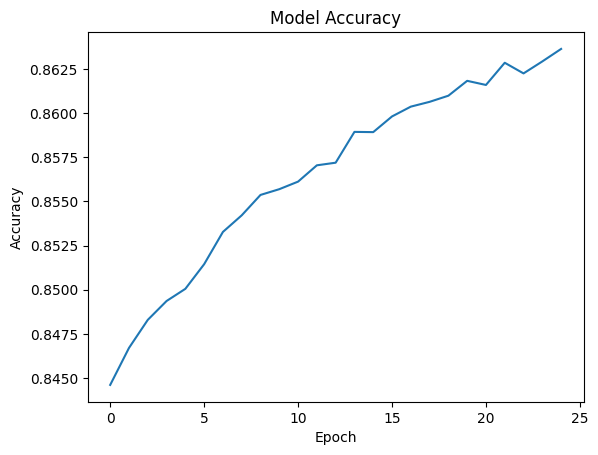

In [ ]:
# Evaluate the model on the test set
# Adjust the test labels to start from 0
Y_test_adjusted = Y_test - 1

# Evaluate your model's performance with the adjusted labels
loss, accuracy = model.evaluate(X_test, Y_test)
print(f"Model test accuracy: {accuracy:.2f}")
print(f"Model test loss: {loss:.2f}")

plt.plot(history.history['accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()





Step 7: Make Predictions


Markdown explanation :

After evaluating the model performence, we need to make predictions and save the submission csv file to evaluate.

In [36]:
# Load the test dataset for prediction
test_data = pd.read_csv('test.csv')

# Make predictions
predictions = model.predict(test_data)
model.predict(X_test)
# Print the predictions
print(predictions)
model.predict(X_test)


2906/2906 [==============================] - 4s 1ms/step
[[0.         0.         0.         ... 0.         0.         0.99999994]
 [0.         0.         0.         ... 0.         0.         0.99999994]
 [0.         0.         0.         ... 0.         0.         0.99999994]
 ...
 [0.         0.         0.         ... 0.         0.         1.        ]
 [1.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         1.        ]]
2906/2906 [==============================] - 4s 1ms/step


array([[9.96909618e-01, 3.09035880e-03, 1.96503891e-24, ...,
        4.35352782e-10, 3.52937915e-23, 1.94800069e-08],
       [8.70249629e-01, 1.05580859e-01, 4.82500914e-11, ...,
        8.88109116e-06, 4.68750327e-09, 2.41606589e-02],
       [9.74936306e-01, 2.49061529e-02, 7.12680475e-08, ...,
        1.15053066e-04, 4.71163517e-08, 4.24606915e-05],
       ...,
       [4.94188331e-02, 9.50455010e-01, 2.81035398e-07, ...,
        7.81417748e-06, 1.18304910e-09, 1.18057134e-04],
       [8.79946185e-07, 1.07758224e-03, 8.14425290e-01, ...,
        5.70610155e-06, 1.83330849e-01, 1.45452758e-27],
       [3.68247479e-02, 9.61248159e-01, 1.51358279e-06, ...,
        1.90841570e-03, 9.24403764e-07, 1.62355154e-05]], dtype=float32)

Step 8 generating submission file.

In [37]:
import pandas as pd
from google.colab import drive

# Load the test dataset
test_data = pd.read_csv('test.csv')

predictions = model.predict(test_data)
predictions = predictions.argmax(axis=1)  # Convert softmax outputs to class labels

# Create a DataFrame for the predictions
submission = pd.DataFrame({'ID': range(1, len(predictions) + 1), 'Predicted_Target': predictions})

# Option 1: Save to current working directory in Colab
submission.to_csv('submission.csv', index=False)

# Option 2: Save to Google Drive
# First, mount Google Drive
drive.mount('/content/drive')

# Specify the path in Google Drive where you want to save the file
# Ensure the path exists or create it manually in your Google Drive
file_path = '/content/drive/My Drive/Colab Notebooks/submission.csv'

# Save the submission file to the specified Google Drive path
submission.to_csv(file_path, index=False)

# Print a message to confirm file has been saved
print(f'File has been saved to: {file_path}')


3632/3632 [==============================] - 7s 2ms/step
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
File has been saved to: /content/drive/My Drive/Colab Notebooks/submission.csv
